# Exercise Sheet 4

## Implementing regression

### Deadline: 08.12.2020 23:59

**Instructions:**
Insert your code in the *TODO* sections ans type your answers in the *Answer* cells. <br>
Submit as a notebook together with the extra files (mentioned in later in the exercise) in an archive.

**Names and Teams IDs:** Philip Georgis [s8phgeor], Pauline Sander [s8pasand], Vilem Zouhar [vizo00001] 

In this exercise we will implement a regression by hand instead of using sklearn package. <br>
We will use the same titanic dataset as last time, so first we have to load it.

In [ ]:
import pandas as pd
## TODO: load the dataset into a pandas dataframe

titanic = pd.read_csv('titanic.csv')

Fitting a regression means finding a line such that the mean distance from the actual datapoints and their projections onto the line (predictions), i.e. the error, is minimal. We achive that by defining the loss function (MSE in case of linear regression) and minimizing it, or in other words, finding the minimum point. <br>

In this exercise we will fit a linear regression with one predictor (age of the passenger) without intercept, so that our loss function is dependent only on the coefficient (aka weight) *w*, so that the loss function is defined as *MSE(w)*. 

### 4.1 Prepare data (0.5 points)
As we are fitting a model without the intercept, we need to center the data.

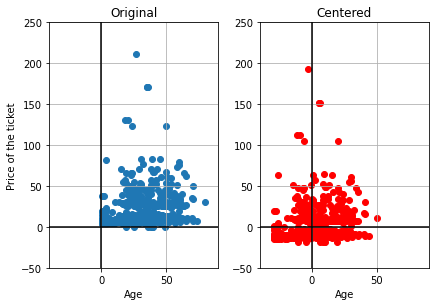

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## TODO: center the input data and save under x (age of the passenger) and y (price of the ticket) variables
x = titanic.Age - np.mean(titanic.Age)
y = titanic.Price - np.mean(titanic.Price)

## Uncomment this part for plotting

fig, axs = plt.subplots(1, 2)
fig.tight_layout()

axs[0].scatter(titanic.Age, titanic.Price)
axs[0].set_title('Original')
axs[0].set_ylabel('Price of the ticket')

axs[1].scatter(x, y, color = 'r')
axs[1].set_title('Centered')

for ax in axs:
    ax.set_xlim(-40, 90)
    ax.set_ylim(-50, 250)
    ax.set_xlabel('Age')
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

plt.show()

### 4.2 Define the loss function (0.5 points)

Write the formula for calculating the loss function *MSE(w)* with $\textbf{X}^{n*m}$ as a matrix with input data, *n* - the number of datapoints, *m* - the number of features, $\textbf{y}^{n}$ - vector containing ground truth values. 

*Answer*: <br>

$MSE(w) = \mathbb{E} [\frac{1}{2} (y - f(X,w))^2]$ with $f(X,w) = Xw$

### 4.3 Create a computational graph for the loss function (2 points)

In this part you will create a computational graph for the loss funciton defined above. Please, have a look at this <a href='https://www.deepideas.net/deep-learning-from-scratch-i-computational-graphs/'>tutorial</a> to understand what a computational graph is.

We will use an application for creating diagrams <a href="https://app.diagrams.net/">draw.io</a> for creating the graph. In the exercise materials there is a file *ComputationalGraphs_Instructions*. Go to the <a href="https://app.diagrams.net/">application</a> and open this file. Follow the instructions in the file.

Save your graph under *computational_graph.png* in the same folder as this notebook and execute the next cell to print it. You can change the *width* parameter to adjust to your image.

Don't forget to add the file to the archive together with this notebook!

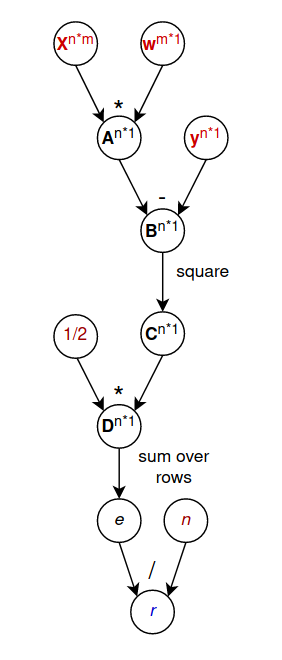

### 4.4 Plot the loss function (2 points)

In this part you will use the computational graph for calculating the loss function and plotting it.

w: (101,) 
x: (714,) 
y: (714,)


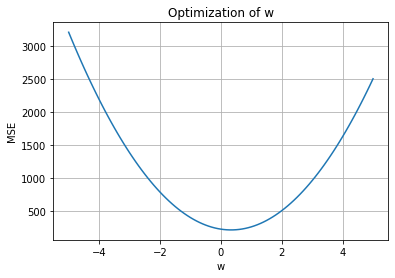

In [ ]:
## TODO: define the input values
##     w: an array of possible values of w for plotting, from -5 to 5 with a step of 0.1
##     x: centered input values (age of the passengers)
##     y: centered output values (price of the ticket)
##     n: number of data points

## Reshape the data according to how you defined dimensions in the computational graph using .reshape() method

w = np.arange(-5,5.1,0.1)
x = x
y = y
n = len(x)

## Uncomment for printing
print('w:', str(w.shape),
      '\nx:', str(x.shape),
      '\ny:', str(y.shape))
      
    
## TODO: compute the intermediate nodes and the output node of the graph.
##       Be consistent with the names of the variables.    
mse = np.zeros(len(w))
for i in range(len(w)):
    A = w[i]*x
    B = A - y
    C = np.square(B)
    D = 0.5 * C
    e = np.sum(D)
    r = e/n
    mse[i] = r


## Uncomment for plotting
plt.plot(w, mse)
plt.xlabel('w')
plt.ylabel('MSE')
plt.title('Optimization of w')
plt.grid(True)
plt.show()

### 4.5 Find the minimum point of the loss function

We can find the minimum point of the function, which is the optimal weight, using its first derivative. <br>
Go through <a href='https://www.khanacademy.org/math/old-differential-calculus/product-quotient-chain-rules-dc'> this tutorial </a> on Khan Academy for refreshment of calculating the derivative.

#### 4.5.1 Get the formula to calculate the optimal weight (2 points)

Insert intermediate steps (you can find them on pages 106-107 of Deep Learning book, chapter 5 Machine Learning) and explain the transitions from one step to another.

*Answer*: <br>
1. $\nabla_w MSE = \nabla_w \frac{1}{n}||\hat{y} - y||_2^2$ = 0
    - replace $\hat{y}$ with $Xw$ because $\hat{y} = Xw$
    - pull $\frac{1}{n}$ out because it is constant
2. $\frac{1}{n} \nabla_w ||Xw - y||_2^2$ = 0
    - multiplying by n gets rid of fraction
    - rewrite squared euclidean norm $|| \mathbf{x} ||_2^2 := \mathbf{x} \cdot{} \mathbf{x}$
3. $\nabla_w (Xw - y)^T(Xw - y) = 0$
    - apply 2nd Binomial formula
    - rewrite $(Xw)^T$ as $w^TX^T$
4. $\nabla_w (w^TX^TXw - 2w^TX^Ty + y^Ty) = 0$
    - first derivative with respect to w ($y^Ty$ vanishes)
5. $2X^TXw - 2X^Ty = 0$
    - $2(X^TXw - X^Ty) = (X^TXw - X^Ty) = 0$
    - $X^TXw = X^Ty \leftrightarrow (X^T X)^{-1}X^TXw = (X^T X)^{-1}X^Ty$
6. $w = (X^T X)^{-1} X^T y$

#### 4.5.2 Compute the optimal **w** (0.5 points)
1. from formula 6;
2. using sklearn: fit a regression (without the intercept!) and get the value of **w** to check your solution.

In [ ]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv # for calculating the inverse

## TODO: compute the optimal w using formula 6 from the exercise above
xarr = np.array(x).reshape(-1, 1)
xarrtransp = np.transpose(xarr)
optimal_w = np.matmul(np.matmul(inv(np.matmul(xarrtransp,xarr)), xarrtransp), np.array(y))    ## this shold be a float number

## TODO: fit a regression without the intercept and get the value of the coefficient (call using .coef_)

regression = LinearRegression(fit_intercept=False).fit(xarr,y)
sk_model_coef =  regression.coef_    ## this shold be a float number

## Uncomment for printing
print('Optimal weight we computed:', '\t\t', str(optimal_w), '\n'
     'Model coefficient from sklearn:', '\t', str(sk_model_coef))

Optimal weight we computed: 		 [0.33511181] 
Model coefficient from sklearn: 	 [0.33511181]


### 4.6 Maxima, minima, saddle points (1 point)

How do we define if a critical point is maximum, minimum or saddle in two-dimensional space? And in multi-dimensional?

*Answer*:

***2D space:***

given some critical point $x_0$:<br>
**Maximum:** if $f(x_0) ≥ f(x)$ for all $x$ in some non-trivial neighborhood $L(x_0)$ [local maximum] or in the whole domain [global maximum]. Alternatively, we can check that the first derivative at $x_0$, $\frac{\delta f}{\delta x}(x_0) = 0$ and the second derivative at $x_0$, $\frac{\delta^2f}{\delta x^2}(x_0) < 0$.

**Minimum:** if $f(x_0) ≤ f(x)$ for all $x$ in some non-trivial neighborhood $L(x_0)$ [local minimum] or in the whole domain [global minimum]. Alternatively, we can check that the first derivative at $x_0$, $\frac{\delta f}{\delta x}(x_0) = 0$ and the second derivative at $x_0$, $\frac{\delta^2f}{\delta x^2}(x_0) > 0$.

**Saddle point:** if the first derivative $\frac{\delta f}{\delta x}(x_0) = 0$ (stationary point), but the critical point does not meet the second derivative criteria for being either a maximum or minimum.

***Multidimensional space:***
Given some critical point $(x_1^0,x_2^0,...,x_n^0)$ in $n$ dimensions, we can apply similar definitions as in 2D space above.

**Maximum:** if $f(x_1^0,x_2^0,...,x_n^0) ≥ f(x_1,x_2,...,x_n)$ for all points in an $n$-dimensional neighborhood $L(x_1^0,x_2^0,...,x_n^0)$ [local maximum] or in the whole domain [global maximum]

**Minimum:** likewise, if $f(x_1^0,x_2^0,...,x_n^0)$ ≤ $f(x_1,x_2,...,x_n)$ for all points in an $n$-dimensional neighborhood $L(x_1^0,x_2^0,...,x_n^0)$ [local minimum] or in the whole domain [global minimum]

**Saddle point:** $P = (x_1^0,x_2^0,...,x_n^0)$, if all partial derivatives $\frac{\delta f}{\delta x_1}(P) = \frac{\delta f}{\delta x_2}(P) \ldots = \frac{\delta f}{\delta x_n}(P) = 0$ (stationary point), but the conditions for neither maximality nor minimality are met.

Note on saddle points: we can check the indefiniteness of the hessian matrix, which is however only a sufficient, not necessary condition.

### 4.7 Convex, concave (1 point)
Give definitions of convex and concave functions (search for the definition on the Internet). <br>


*Answer*:<br>
**Convex function:** a function for which a line drawn between any two points on the graph of the function is *above* all intervening points on the graph<br>
**Concave function:** a function for which a line segment drawn between any two points on the function's graph will lie *below* all intervening points on the graph
    

If we set $\nabla MSE(w) = 0$ and solve for *w*, are we bound to find the **global minimum**? Why/why not?

*Answer*:

Yes, because since the function is convex, continuous and is not a simple function, it has only one extrema (convexity) and therefore a unique solution to that equation.

This does not work in higher dimensions and is not true for every function, because it is possible that the point we find is a *local minimum* rather than the global minimum. Moreover, all critical points (including maxima and saddle points) have ∇ (gradient) = 0, so the point may not be a minimum at all.

### 4.8 Gradient descent (0.5 point)

Gradient descent is a method of approaching the minimum point by finding the direction of the steepest gradient and taking steps in that direction; the size of steps is defined by the learning rate.

Give an illustration of a case when the step size is chosen badly, i.e. we can not reach the minimum.

You can make a drawing by hand, take a picture and insert it into a markdown cell. Don't forget to save the file to the main archive. Support your illustration by ca. 2 sentences.

*Answer*:

Assume the function $f(x) = x^2$, $\frac{\delta f}{\delta x} = f'(x) = 2x$. We choose $\alpha = 1$ and start our descent at $x_0 = 1$.

The first step: $x_1 = x_0 - \alpha \cdot f'(x_0) = 1 - 1 \cdot 2 = -1$.

The second step: $x_2 = x_1 - \alpha \cdot f'(x_1) = -1 - 1 \cdot (-2) = 1$. 

This is however equal to $x_0$, so we are stuck alternating between $x_0$ and $x_1$, not reaching the minimum at $x=0$.

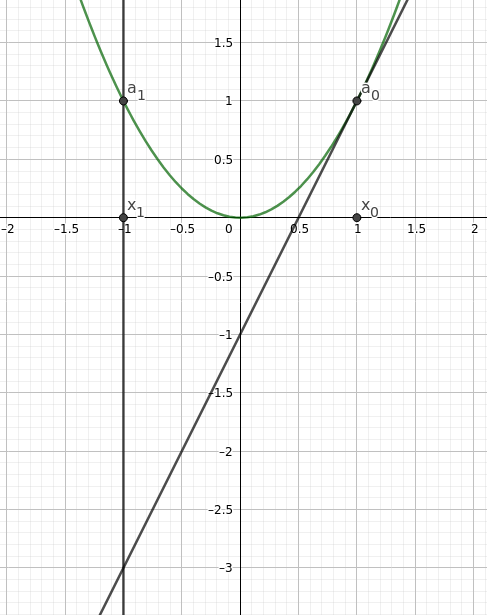
